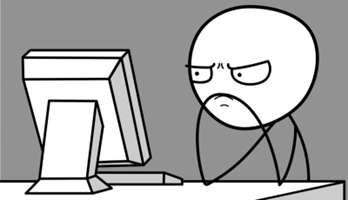

Para ejercitarte y afianzar lo aprendido sobre **Comparacion Modelos**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [31]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np


### Ejercicio 1

Caraga el dataset de viajes. Muestra sus primeras filas, su información general y considera la variable ingresos como target, muestra su distribución.

In [32]:
data = pd.read_csv('data/dataset_viajes_jun23.csv')
target = 'ingresos'
data

aircompany       origen      destino  distancia        avion  con_escala  \
0        Airnar        París      Ginebra        411   Boeing 737       False   
1          FlyQ         Bali         Roma      12738   Boeing 737        True   
2      TabarAir      Ginebra  Los Angeles       9103  Airbus A380       False   
3    MoldaviAir        París   Cincinnati       6370   Boeing 737       False   
4      TabarAir   Cincinnati         Roma       7480   Boeing 747       False   
..          ...          ...          ...        ...          ...         ...   
595   PamPangea         Bali      Londres      12553   Boeing 737        True   
596      Airnar        Cádiz        París       1447  Airbus A380       False   
597      Airnar  Los Angeles        Cádiz       9373   Boeing 737       False   
598        FlyQ    Barcelona         Bali      13058   Boeing 747        True   
599    TabarAir      Londres   Nueva York       5566   Boeing 747       False   

        consumo_kg  duracion   ingresos        id_vuelo    mes  
0      1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1     33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2    109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3     17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4     86115.744000       518  438535.07  Tab_CiRo_10747  Jun23  
..             ...       ...        ...             ...    ...  
595   33310.138680      1153  442668.52  Pam_BaLo_10737  Jun23  
596   17229.139600       116   87307.63  Air_CaPa_11380  Jun23  
597   23231.917800       731  339943.47  Air_LoCa_10737  Jun23  
598  144766.211200      1070  752212.98  Fly_BaBa_10747  Jun23  
599   62893.573600       391  330320.81  Tab_LoNu_10747  Jun23  

[600 rows x 11 columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


### Ejercicio 2

Deshazte de la columna de id y la de mes, convierte las variables categóricas usando un one-hot encoding (no necesariamente el de sklearn) NOTA: Podemos hacer esto porque no vamos a analizar con detalle las categóricas, en cuyo caso tendríamos que hacer el encoding después del mini-EDA, es decir después del split y no necesariamente tendría que ser un one-hot encoding.

In [34]:
data.drop(['id_vuelo', 'mes'], axis=1, inplace=True)

In [35]:
categorical_cols = data.select_dtypes(include=['object']).columns  # Selecciona todas las columnas de tipo object
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # Aplica one-hot encoding
data

distancia  con_escala     consumo_kg  duracion   ingresos  \
0          411       False    1028.691900        51   14232.65   
1        12738        True   33479.132544      1167  468527.19   
2         9103       False  109439.907200       626  584789.19   
3         6370       False   17027.010000       503  233342.51   
4         7480       False   86115.744000       518  438535.07   
..         ...         ...            ...       ...        ...   
595      12553        True   33310.138680      1153  442668.52   
596       1447       False   17229.139600       116   87307.63   
597       9373       False   23231.917800       731  339943.47   
598      13058        True  144766.211200      1070  752212.98   
599       5566       False   62893.573600       391  330320.81   

     aircompany_FlyQ  aircompany_MoldaviAir  aircompany_PamPangea  \
0              False                  False                 False   
1               True                  False                 False   
2              False                  False                 False   
3              False                   True                 False   
4              False                  False                 False   
..               ...                    ...                   ...   
595            False                  False                  True   
596            False                  False                 False   
597            False                  False                 False   
598             True                  False                 False   
599            False                  False                 False   

     aircompany_TabarAir  origen_Barcelona  ...  destino_Ginebra  \
0                  False             False  ...             True   
1                  False             False  ...            False   
2                   True             False  ...            False   
3                  False             False  ...            False   
4                   True             False  ...            False   
..                   ...               ...  ...              ...   
595                False             False  ...            False   
596                False             False  ...            False   
597                False             False  ...            False   
598                False              True  ...            False   
599                 True             False  ...            False   

     destino_Londres  destino_Los Angeles  destino_Melbourne  \
0              False                False              False   
1              False                False              False   
2              False                 True              False   
3              False                False              False   
4              False                False              False   
..               ...                  ...                ...   
595             True                False              False   
596            False                False              False   
597            False                False              False   
598            False                False              False   
599            False                False              False   

     destino_Nueva York  destino_París  destino_Roma  avion_Airbus A380  \
0                 False          False         False              False   
1                 False          False          True              False   
2                 False          False         False               True   
3                 False          False         False              False   
4                 False          False          True              False   
..                  ...            ...           ...                ...   
595               False          False         False              False   
596               False           True         False               True   
597               False          False         False              False   
598               False          False         

### Ejercicio 3

Divide en train y test. Crea los sets de train y test a partir de los anteriores utilizando todos los valores, ¿por qué no escalamos o transformamos las numéricas?

In [36]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'X' son todas las columnas excepto tu variable target
X = data.drop('ingresos', axis=1)
y = data['ingresos']

# Dividiendo los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ayuda a prevenir problemas de sobreajuste y garantiza que la evaluación del modelo sea lo más realista posible respecto a cómo se comportará en un entorno de producción.

### Ejercicio 4

Instancia un modelo basado en RandomForest, XGBoost y LightGBM.

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Instanciando el modelo de RandomForest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model


RandomForestRegressor(random_state=42)

In [38]:
from xgboost import XGBRegressor

# Instanciando el modelo de XGBoost
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
from lightgbm import LGBMRegressor

# Instanciando el modelo de LightGBM
lightgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lightgbm_model


LGBMRegressor(random_state=42)

In [40]:
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 29
[LightGBM] [Info] Start training from score 413472.385565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

LGBMRegressor(random_state=42)

### Ejercicio 5

Crea una función a la que se le pase un modelo, un dataset de features y un target asociado a ese dataset y muestre el MAE, MAPE y RMSE del modelo considerando las predicciones contra el dataset de features frente al target

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X, y):
    """
    Evalúa un modelo de regresión en el conjunto proporcionado y muestra MAE, MAPE y RMSE.

    Parámetros:
        model: modelo de regresión entrenado (debe soportar el método .predict()).
        X: DataFrame o matriz de características (features) del conjunto a evaluar.
        y: Serie o arreglo con los valores target del conjunto a evaluar.

    Muestra:
        MAE, MAPE y RMSE del modelo evaluado.
    """
    # Realizando predicciones con el modelo en el conjunto de datos proporcionado
    predictions = model.predict(X)
    
    # Calculando MAE
    mae = mean_absolute_error(y, predictions)
    
    # Calculando MAPE
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    
    # Calculando RMSE
    rmse = np.sqrt(mean_squared_error(y, predictions))
    
    # Imprimiendo los resultados
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'RMSE: {rmse:.4f}')

# Ejemplo de cómo usar la función
# Suponiendo que random_forest_model es un modelo previamente entrenado:
evaluate_model(random_forest_model, X_test, y_test)


MAE: 11729.2813
MAPE: 3.0573%
RMSE: 17691.0067


### Ejercicio 6

Entrena los tres contra train, muestra el report de errores de cada uno contra el dataset de train utilizando la función del ejercicio anterior.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instanciando los modelos
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lightgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenando los modelos
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
lightgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 29
[LightGBM] [Info] Start training from score 413472.385565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

LGBMRegressor(random_state=42)

In [43]:
# Definiendo la función evaluate_model si no ha sido definida en tu ambiente actual
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'RMSE: {rmse:.4f}')

# Evaluando RandomForest
print("Evaluación de RandomForest:")
evaluate_model(random_forest_model, X_train, y_train)

# Evaluando XGBoost
print("\nEvaluación de XGBoost:")
evaluate_model(xgboost_model, X_train, y_train)

# Evaluando LightGBM
print("\nEvaluación de LightGBM:")
evaluate_model(lightgbm_model, X_train, y_train)



Evaluación de RandomForest:
MAE: 4867.9240
MAPE: 1.2255%
RMSE: 7478.9128

Evaluación de XGBoost:
MAE: 3714.0684
MAPE: 1.3006%
RMSE: 5496.9507

Evaluación de LightGBM:
MAE: 9154.4449
MAPE: 2.3583%
RMSE: 15675.4610


### Ejercicio 7

El reporte contra train puede ser engañoso, de hecho podría haber bastante overfitting, por eso para comparar modelos empleamos de primeras la validación cruzada. Obten el RMSE medio para cada modelo usando la validación cruzada tal y como has visto en los workout y escoge un modelo. NOTA: Recuerda el "problemilla" con usar un score que es un error para sklearn

In [44]:
# Definiendo la función evaluate_model si no ha sido definida en tu ambiente actual
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'RMSE: {rmse:.4f}')

# Evaluando RandomForest
print("Evaluación de RandomForest:")
evaluate_model(random_forest_model, X_train, y_train)

# Evaluando XGBoost
print("\nEvaluación de XGBoost:")
evaluate_model(xgboost_model, X_train, y_train)

# Evaluando LightGBM
print("\nEvaluación de LightGBM:")
evaluate_model(lightgbm_model, X_train, y_train)


Evaluación de RandomForest:
MAE: 4867.9240
MAPE: 1.2255%
RMSE: 7478.9128

Evaluación de XGBoost:
MAE: 3714.0684
MAPE: 1.3006%
RMSE: 5496.9507

Evaluación de LightGBM:
MAE: 9154.4449
MAPE: 2.3583%
RMSE: 15675.4610


In [45]:
# Función para calcular el RMSE negativo
def rmse_cross_val(model, X, y):
    # cross_val_score retorna un score de precisión; usamos 'neg_mean_squared_error' para obtener MSE negativo
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    # Convertimos MSE negativo a RMSE positivo
    rmse = (-mse)**0.5
    return rmse.mean()

# Calculando RMSE medio para cada modelo utilizando validación cruzada
random_forest_rmse = rmse_cross_val(random_forest_model, X, y)
xgboost_rmse = rmse_cross_val(xgboost_model, X, y)
lightgbm_rmse = rmse_cross_val(random_forest_model, X, y)

print(f"Random Forest RMSE: {random_forest_rmse:.4f}")
print(f"XGBoost RMSE: {xgboost_rmse:.4f}")
print(f"LightGBM RMSE: {lightgbm_rmse:.4f}")


Random Forest RMSE: 18728.4118
XGBoost RMSE: 21054.2895
LightGBM RMSE: 18728.4118


### Ejercicio 8

Optimiza los hiperparámetros del modelo escogido. Escoge un grid pequeño, pero que incluya los valores por defecto (si no, no aparecerá el que ha salido mejor en la comparación por validación cruzada)




In [46]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Definición del modelo
xgboost_model = XGBRegressor(random_state=42)

# Definición del grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],  # incluye el default de 100
    'learning_rate': [0.01, 0.1, 0.2],  # default es 0.1
    'max_depth': [3, 6, 9],  # default es 6
    'subsample': [0.8, 1.0],  # default es 1
    'colsample_bytree': [0.8, 1.0]  # default es 1
}

# Crear la instancia de GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


In [47]:
# Ejecutando la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrando los mejores parámetros
print("Mejores hiperparámetros encontrados: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros encontrados:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [48]:
# Calculando RMSE para el modelo con los mejores parámetros
best_xgboost = grid_search.best_estimator_
mse = cross_val_score(best_xgboost, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse = (-mse)**0.5
print(f"RMSE medio con los mejores hiperparámetros: {rmse.mean():.4f}")


RMSE medio con los mejores hiperparámetros: 17755.0816


### Ejercicio 9

Muestra los hiperparámetros escogidos y el score de ese estimador en la validación cruzada interna que habrá hecho el GridSearchCV

In [49]:
# Asumiendo que 'grid_search' es tu objeto GridSearchCV después de ejecutar .fit()
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)

# Mejor score MSE negativo
best_mse = grid_search.best_score_

# Convertir MSE negativo a RMSE positivo
best_rmse = np.sqrt(-best_mse)
print(f"Mejor RMSE en la validación cruzada interna: {best_rmse:.4f}")


Mejores hiperparámetros encontrados:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor RMSE en la validación cruzada interna: 17761.5845


In [50]:
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)
print(f"Mejor RMSE en la validación cruzada interna: {best_rmse:.4f}")


Mejores hiperparámetros encontrados:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor RMSE en la validación cruzada interna: 17761.5845


### Ejercicio 10

Para completar la visión de comparación de modelos aplica un grid más o menos equivalente al que has aplicado a RandomForest al modelo de XGBoost, muestra el valor de la métrica para el modelo escogido (Es posible que esta parte es la que más te cueste, mira la solución para el grid si es necesario)

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir el modelo de XGBoost
xgb_model = XGBRegressor(random_state=42)

# Definir el grid de hiperparámetros
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear la instancia de GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


In [52]:
# Ejecutar la búsqueda en cuadrícula
xgb_grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [53]:
# Calcular RMSE para el modelo con los mejores parámetros
xgb_best_rmse = np.sqrt(-xgb_best_score)
print("Mejores hiperparámetros para XGBoost:\n", xgb_best_params)
print(f"Mejor RMSE en la validación cruzada interna para XGBoost: {xgb_best_rmse:.4f}")


Mejores hiperparámetros para XGBoost:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor RMSE en la validación cruzada interna para XGBoost: 17761.5845


### Ejercicio 11

Para completar la visión de comparación de modelos aplica un grid más o menos equivalente al que has aplicado a RandomForest al modelo de LightGBM, muestra el valor de la métrica para el modelo escogido (Es posible que esta parte es la que más te cueste, mira la solución para el grid si es necesario)

In [54]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir el modelo de LightGBM
lgb_model = LGBMRegressor(random_state=42)

# Definir el grid de hiperparámetros
lgb_param_grid = {
    'n_estimators': [50, 100, 150],  # Cantidad de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 6, 9],  # Profundidad máxima de los árboles
    'subsample': [0.8, 1.0],  # Porcentaje de muestras usadas por árbol
    'colsample_bytree': [0.8, 1.0]  # Porcentaje de características usadas por árbol
}

# Crear la instancia de GridSearchCV
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)


In [55]:
# Ejecutar la búsqueda en cuadrícula
lgb_grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
lgb_best_params = lgb_grid_search.best_params_
lgb_best_score = lgb_grid_search.best_score_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 28
[LightGBM] [Info] Start training from score 416215.705053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [56]:
# Calcular RMSE para el modelo con los mejores parámetros
lgb_best_rmse = np.sqrt(-lgb_best_score)
print("Mejores hiperparámetros para LightGBM:\n", lgb_best_params)
print(f"Mejor RMSE en la validación cruzada interna para LightGBM: {lgb_best_rmse:.4f}")


Mejores hiperparámetros para LightGBM:
 {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Mejor RMSE en la validación cruzada interna para LightGBM: 20430.8647


### Ejercicio 12

¿Cuál es el modelo escogido de los tres optimizados? Evalua ese contra test.

In [57]:
from sklearn.metrics import mean_squared_error

# Asumiendo que lgb_best_model es tu modelo LightGBM optimizado obtenido de GridSearchCV
lgb_best_model = lgb_grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de test
y_pred = lgb_best_model.predict(X_test)

# Calcular RMSE para el conjunto de test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en el conjunto de test para LightGBM: {rmse_test:.4f}")


RMSE en el conjunto de test para LightGBM: 16797.1671
